# Simulation-Sheldon_Ross 

## Ejercicio 24

<p>Los autobuses llegan a un evento deportivo de acuerdo con un proceso de Poisson con una tasa de 5 por hora. Cada autobús tiene la misma probabilidad de contener entre 20, 21, ..., 40 fanáticos, siendo independientes los números de pasajeros en diferentes autobuses. Escribe un algoritmo para simular la llegada de fanáticos al evento hasta el tiempo <b>t=1</b>.</p>

In [6]:
import numpy as np

def simulate_fan_arrival(lambda_rate=5, t_max=1):
    # Inicialización
    time = 0
    total_fans = 0

    # Simulación de llegadas de autobuses
    while time < t_max:
        # Generar tiempo entre llegadas (exponencial)
        interarrival_time = np.random.exponential(1 / lambda_rate)
        time += interarrival_time
        
        if time < t_max:
            # Generar el número de fanáticos por autobús (uniforme entre 20 y 40)
            fans_in_bus = np.random.randint(20, 41)
            total_fans += fans_in_bus

    return total_fans

# Ejecutar la simulación
total_fans = simulate_fan_arrival()
print(f"Total de fanáticos que llegan antes de t=1: {total_fans}")

Total de fanáticos que llegan antes de t=1: 116


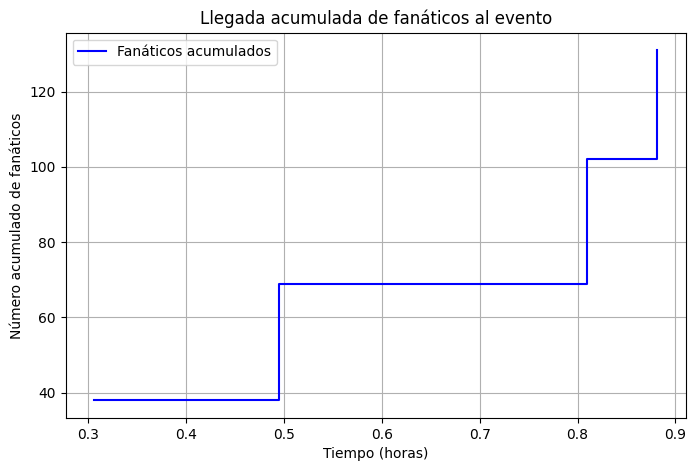

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_fan_arrival_with_plot(lambda_rate=5, t_max=1):
    # Inicialización
    time = 0
    total_fans = 0
    times = []
    fan_counts = []

    # Simulación de llegadas de autobuses
    while time < t_max:
        # Generar tiempo entre llegadas (exponencial)
        interarrival_time = np.random.exponential(1 / lambda_rate)
        time += interarrival_time
        
        if time < t_max:
            # Generar el número de fanáticos por autobús (uniforme entre 20 y 40)
            fans_in_bus = np.random.randint(20, 41)
            total_fans += fans_in_bus
            
            # Guardar datos para graficar
            times.append(time)
            fan_counts.append(total_fans)

    return times, fan_counts

# Ejecutar la simulación
times, fan_counts = simulate_fan_arrival_with_plot()

# Graficar los resultados
plt.figure(figsize=(8, 5))
plt.step(times, fan_counts, where='post', label="Fanáticos acumulados", color='b')
plt.xlabel("Tiempo (horas)")
plt.ylabel("Número acumulado de fanáticos")
plt.title("Llegada acumulada de fanáticos al evento")
plt.grid(True)
plt.legend()
plt.show()


## Ejercicio 25

<p>(a) Escribe un programa que utilice el algoritmo de thinning para generar las primeras 10 unidades de tiempo de un proceso de Poisson no homogéneo con función de intensidad:</p>
<b>λ(t) = 3 + 4/(t+1)</b>

In [8]:
def simulate_thinning(lambda_max=7, t_max=10):
    # Inicialización
    times = []
    time = 0

    while time < t_max:
        # Generar tiempo entre llegadas del proceso homogéneo
        interarrival_time = np.random.exponential(1 / lambda_max)
        time += interarrival_time
        
        if time < t_max:
            # Evaluar lambda(t)
            lambda_t = 3 + 4 / (time + 1)
            # Aceptar o rechazar
            if np.random.uniform(0, 1) < lambda_t / lambda_max:
                times.append(time)
    
    return times

# Ejecutar la simulación
event_times = simulate_thinning()
print(f"Tiempos de eventos aceptados: {event_times}")

Tiempos de eventos aceptados: [0.07768948356198109, 0.2881580618052044, 0.31312712658112873, 0.3248176301246219, 0.3728646080357254, 0.4875449415723539, 0.5158108564320063, 0.7085810130789179, 0.8650610597957001, 1.1861411628843475, 1.7862226006471098, 2.121355556571166, 2.1465649489685936, 2.289129972198888, 2.824835301541406, 2.888625507075805, 3.0004357558941073, 3.0451083365497844, 3.2194593273730554, 3.6206564225253777, 3.7048119368828143, 3.7200448916951445, 4.059546860784315, 4.102970939294992, 4.817378785570153, 5.2501547992635835, 5.355894812921765, 5.527576083085695, 5.620299145388917, 5.961675548686236, 6.260230325814273, 6.733243378287794, 7.571423416120025, 7.72774486205983, 7.737510952118326, 9.019808467352473, 9.101149684601824, 9.216778734576863, 9.670159163392729, 9.886718944614831]


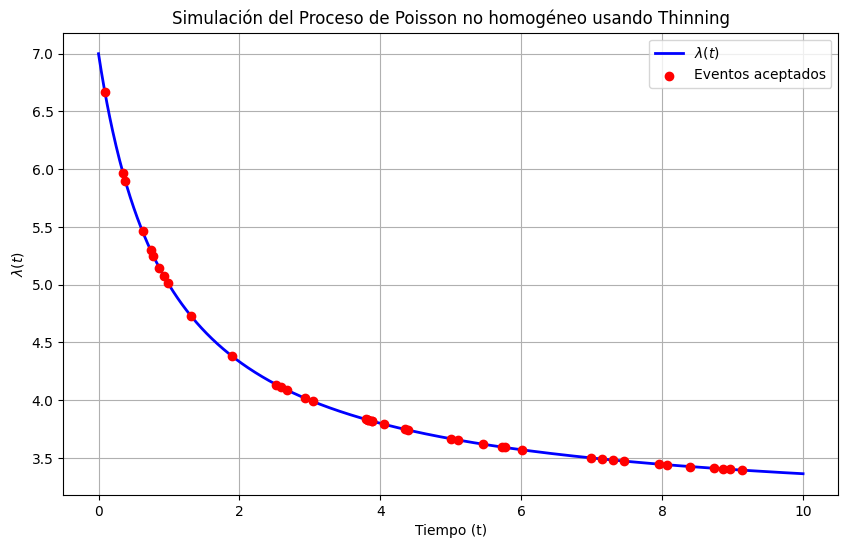

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_thinning_with_plot(lambda_max=7, t_max=10):
    # Inicialización
    times = []
    time = 0

    while time < t_max:
        # Generar tiempo entre llegadas del proceso homogéneo
        interarrival_time = np.random.exponential(1 / lambda_max)
        time += interarrival_time
        
        if time < t_max:
            # Evaluar lambda(t)
            lambda_t = 3 + 4 / (time + 1)
            # Aceptar o rechazar
            if np.random.uniform(0, 1) < lambda_t / lambda_max:
                times.append(time)
    
    return times

# Ejecutar la simulación
event_times = simulate_thinning_with_plot()

# Crear la función lambda(t)
def lambda_t_function(t):
    return 3 + 4 / (t + 1)

# Datos para graficar lambda(t)
t_values = np.linspace(0, 10, 1000)
lambda_values = lambda_t_function(t_values)

# Graficar los resultados
plt.figure(figsize=(10, 6))

# Graficar lambda(t)
plt.plot(t_values, lambda_values, label=r'$\lambda(t)$', color='blue', linewidth=2)

# Graficar los eventos aceptados
plt.scatter(event_times, [lambda_t_function(t) for t in event_times], color='red', label='Eventos aceptados', zorder=5)

# Personalizar el gráfico
plt.xlabel("Tiempo (t)")
plt.ylabel(r"$\lambda(t)$")
plt.title("Simulación del Proceso de Poisson no homogéneo usando Thinning")
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


</p>(b) Propón una manera de mejorar el algoritmo de thinning para este ejemplo.<p>

### Mejoras al Algoritmo de Thinning

#### 1. Dividir el intervalo en subintervalos
Si la intensidad **λ(t)** varía significativamente, se puede dividir el intervalo **[0, 10]** en regiones más pequeñas donde la función **λ(t)** sea aproximadamente constante. Esto permite ajustar **λ_max** localmente y reducir los rechazos.

Por ejemplo:
- En **t ∈ [0, 2]**, **λ(t) ≈ 7**.
- En **t ∈ [8, 10]**, **λ(t) ≈ 3.5**.

Dividir el intervalo ayuda a optimizar la generación de eventos al reducir el número de rechazos.

---

#### 2. Utilizar una función cota más ajustada para **λ_max**
En lugar de usar el máximo global de **λ(t)**, se puede emplear una función que sea una cota más ajustada a **λ(t)**. Esto incluye:
- Usar un máximo por tramos (como en el punto anterior).
- Usar una función aproximada más cercana a **λ(t)** para reducir rechazos.

Estas mejoras hacen el algoritmo más eficiente, ya que se generan menos eventos rechazados durante el proceso de thinning.


## Ejercicio 26

<p>Proporciona un algoritmo eficiente para generar las primeras 10 unidades de tiempo de un proceso de Poisson no homogéneo con la siguiente función de intensidad:
</p>
<p> λ(t) =  t / 5, &nbsp;&nbsp;&nbsp; <b>0 ≤ t &lt; 5</b></p> 
<p> λ(t) = 1 + 5(t - 5), &nbsp;&nbsp;&nbsp; <b>5 ≤ t ≤ 10</b></p> 

In [12]:
def simulate_piecewise_poisson(t_max=10):
    times = []
    
    # Tramo 1: [0, 5] con lambda(t) = t / 5
    t = 0
    while t < 5:
        interarrival_time = np.random.exponential(1)
        t += interarrival_time
        if t < 5:
            lambda_t = t / 5
            if np.random.uniform(0, 1) < lambda_t:
                times.append(t)
    
    # Tramo 2: [5, 10] con lambda(t) = 1 + 5(t - 5)
    while t < t_max:
        interarrival_time = np.random.exponential(1 / 26)
        t += interarrival_time
        if t < t_max:
            lambda_t = 1 + 5 * (t - 5)
            if np.random.uniform(0, 1) < lambda_t / 26:
                times.append(t)

    return times

# Ejecutar la simulación
event_times = simulate_piecewise_poisson()
print(f"Tiempos de eventos: {event_times}")


Tiempos de eventos: [3.253405268064029, 3.786076946882233, 5.624094214771732, 5.660004784821898, 6.1247224826558, 6.126597162349821, 6.128383688422157, 6.169139147730773, 6.4351831603468295, 6.609924519305197, 6.624756429460053, 6.769870770197804, 6.923610957233285, 7.059407458257418, 7.090866254633163, 7.100652941204573, 7.1142476927823965, 7.164521514747403, 7.257059607018303, 7.282482912783798, 7.293481637206001, 7.482241338749903, 7.543355685298992, 7.580982512905962, 7.639473665948354, 7.6623205639768255, 7.666406694436841, 7.691242010164302, 7.705884617367162, 7.7385570088315125, 7.75676251106274, 7.757766950758785, 7.764373185768689, 7.812921994819036, 7.819980681351983, 7.858743059634478, 7.878458843014901, 7.931936299438434, 7.951640427505983, 8.178468885066389, 8.238605087862059, 8.478580470848538, 8.506082036046802, 8.51419727714529, 8.516565603970083, 8.551869843519482, 8.668271539647847, 8.68865047466131, 8.715521016790714, 8.734019310600786, 8.791776208288793, 8.812016344

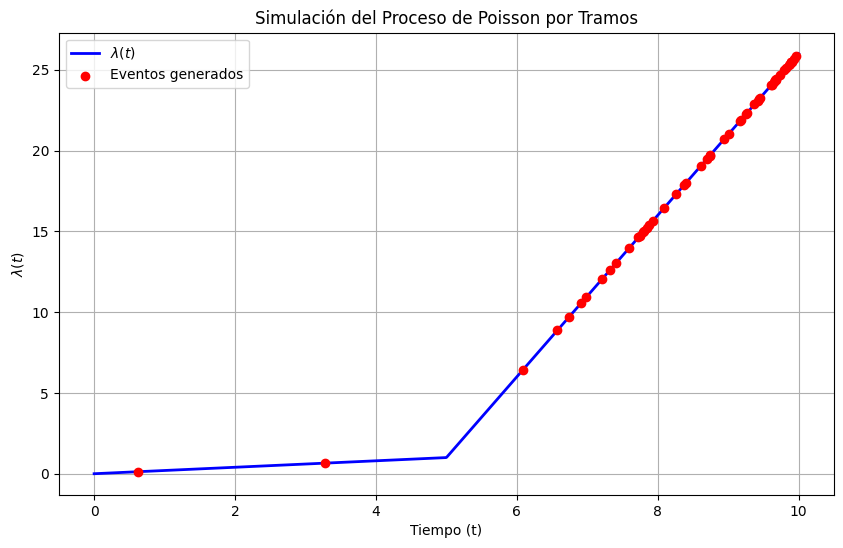

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_piecewise_poisson_with_plot(t_max=10):
    times = []
    
    # Tramo 1: [0, 5] con lambda(t) = t / 5
    t = 0
    while t < 5:
        interarrival_time = np.random.exponential(1)
        t += interarrival_time
        if t < 5:
            lambda_t = t / 5
            if np.random.uniform(0, 1) < lambda_t:
                times.append(t)
    
    # Tramo 2: [5, 10] con lambda(t) = 1 + 5(t - 5)
    while t < t_max:
        interarrival_time = np.random.exponential(1 / 26)
        t += interarrival_time
        if t < t_max:
            lambda_t = 1 + 5 * (t - 5)
            if np.random.uniform(0, 1) < lambda_t / 26:
                times.append(t)

    return times

# Ejecutar la simulación
event_times = simulate_piecewise_poisson_with_plot()

# Crear la función lambda(t)
def lambda_t_piecewise(t):
    if t < 5:
        return t / 5
    else:
        return 1 + 5 * (t - 5)

# Generar datos para graficar lambda(t)
t_values = np.linspace(0, 10, 1000)
lambda_values = [lambda_t_piecewise(t) for t in t_values]

# Graficar los resultados
plt.figure(figsize=(10, 6))

# Graficar lambda(t)
plt.plot(t_values, lambda_values, label=r'$\lambda(t)$', color='blue', linewidth=2)

# Graficar los eventos aceptados
plt.scatter(event_times, [lambda_t_piecewise(t) for t in event_times], color='red', label='Eventos generados', zorder=5)

# Personalizar el gráfico
plt.xlabel("Tiempo (t)")
plt.ylabel(r"$\lambda(t)$")
plt.title("Simulación del Proceso de Poisson por Tramos")
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [ ]:
print("hola mnundo")